Установка Keras Tuner

In [10]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Импорт модулей

In [11]:
import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback
from kerastuner.tuners import Hyperband
import IPython

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загрузка данных

In [13]:
data = pd.read_csv('/content/drive/My Drive/train/train.csv')
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


# Подготовка данных

Удаление столбцов  id и timestamp

In [14]:
del data['id']
del data['timestamp']
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,9,4,0,13,22,1,0,52,4,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,15,3,0,15,29,1,10,66,14,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,10,3,0,11,27,0,4,67,10,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,11,2,1,4,4,0,0,26,3,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,319,108,17,135,236,2,91,195,14,16331452


Сохранение значений таргетного поля

In [15]:
y = data.get('price_doc')
data = data.drop('price_doc', axis=1)
y

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
30466     7400000
30467    25000000
30468     6970959
30469    13500000
30470     5600000
Name: price_doc, Length: 30471, dtype: int64

Замена полей, содержащих NaN или текстовые значения

In [16]:
data[data.columns] = SimpleImputer(strategy="most_frequent").fit_transform(data[data.columns])
df = pd.DataFrame(data)
data = df.apply(preprocessing.LabelEncoder().fit_transform)
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,38,22,4,17,0,112,2,1,1,0,...,40,9,4,0,13,22,1,0,52,4
1,29,14,3,17,0,112,2,1,1,0,...,36,15,3,0,15,29,1,10,66,14
2,38,24,2,17,0,112,2,1,1,0,...,25,10,3,0,11,27,0,4,67,10
3,84,45,9,17,0,112,2,1,1,0,...,15,11,2,1,4,4,0,0,26,3
4,72,72,4,17,0,112,2,1,1,0,...,525,317,108,17,135,236,2,91,195,14


Стандартизация данных

In [17]:
mean = data.mean(axis=0)
std = data.std(axis=0)
data -= mean
data /= std
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,-0.514273,-0.220294,-0.687254,0.520448,-0.441364,0.697615,0.089129,-0.749251,-0.09228,-0.752845,...,-0.185810,-0.314262,-0.238989,-0.326969,-0.070249,-0.174274,0.915161,-0.420238,-0.016753,-0.406419
1,-0.938772,-0.673901,-0.875884,0.520448,-0.441364,0.697615,0.089129,-0.749251,-0.09228,-0.752845,...,-0.219793,-0.231998,-0.274218,-0.326969,-0.001564,-0.026432,0.915161,0.065653,0.286146,1.638898
2,-0.514273,-0.106893,-1.064514,0.520448,-0.441364,0.697615,0.089129,-0.749251,-0.09228,-0.752845,...,-0.313248,-0.300551,-0.274218,-0.326969,-0.138933,-0.068673,-0.726150,-0.225882,0.307781,0.820771
3,1.655388,1.083825,0.255896,0.520448,-0.441364,0.697615,0.089129,-0.749251,-0.09228,-0.752845,...,-0.398206,-0.286840,-0.309447,-0.142427,-0.379329,-0.554438,-0.726150,-0.420238,-0.579278,-0.610950
4,1.089389,2.614749,-0.687254,0.520448,-0.441364,0.697615,0.089129,-0.749251,-0.09228,-0.752845,...,3.934686,3.908621,3.424831,2.810253,4.119503,4.345458,2.556473,4.001371,3.077137,1.638898


# Создание и обучение нейросети

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state = 2)

Создание и обучение нейросети

In [19]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(248, activation="relu"))
model.add(Dense(122, activation="relu"))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

history = model.fit(x_train, y_train, epochs=50, batch_size=125, verbose=2, validation_split=0.3)
print(history)
history = history.history
print("[INFO] Training has been finished")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               148480    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 248)               127224    
                                                                 
 dense_2 (Dense)             (None, 122)               30378     
                                                                 
 dense_3 (Dense)             (None, 1)                 123       
                                                                 
Total params: 306,205
Trainable params: 306,205
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
120/120 - 7s - loss: 72786659770368.000

Построение графика

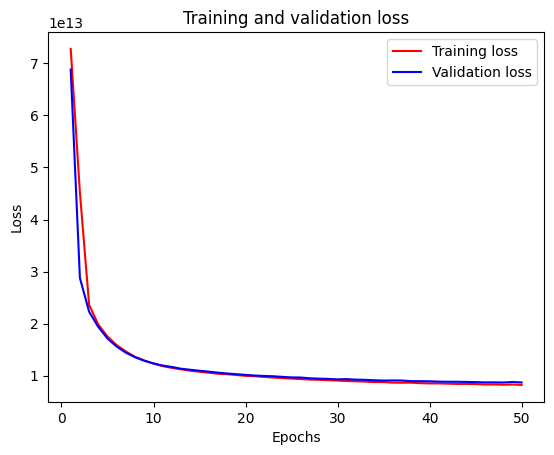

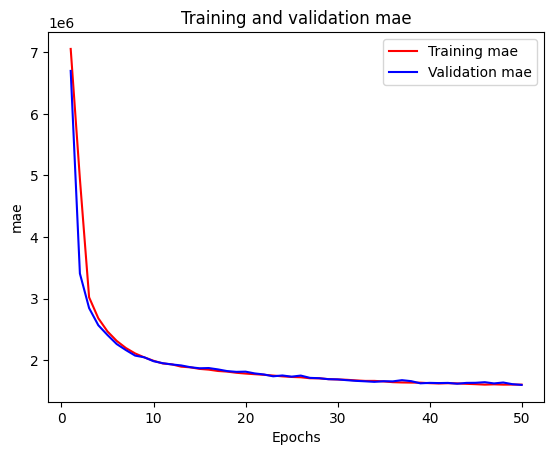

In [20]:
def graphs(history):
    loss = history["loss"]
    val_loss = history["val_loss"]
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()

    mae = history['mae']
    val_mae = history['val_mae']
    plt.plot(epochs, mae, 'r', label='Training mae')
    plt.plot(epochs, val_mae, 'b', label='Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

graphs(history)

Предсказания и подсчет коэффициента корреляции

In [21]:
predicted_y = model.predict(x_test)
predicted_y = np.reshape(predicted_y, (predicted_y.shape[0]))

cc = np.corrcoef(predicted_y, y_test)
cc = cc[0][1]
print(f'Correlation Coefficient: {cc}')

286/286 [==============================] - 1s 3ms/step
Correlation Coefficient: 0.792315701596067


# Keras Tuner

Создание модели

In [22]:
def build_model(hp):
  hidden_layers = hp.Choice('hidden_layers', values=[1,2,3])
  activation_choice = hp.Choice('activation', values=['relu', 'selu', 'elu'])
  model = Sequential()
  model.add(Dense(units=hp.Int('units',min_value=256,max_value=512,step=32),activation=activation_choice, input_shape=(x_train.shape[1], )))
  model.add(Dropout(0.3))
  for i in range(hidden_layers):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',min_value=32//(i+1), max_value=128//(i+1),step=64//(i+1)),activation=activation_choice))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss="mse", metrics=["mae"])
  return model

Поиск лучшей модели с помощью Hyperband

In [23]:
def find_best(x_train, y_train):
  # создаю тюнер, который сможет подобрать оптимальную архитектуру модели
  tuner = Hyperband(build_model, objective="loss", max_epochs=10, hyperband_iterations=3)
  print("\n\n\n")
  # начинается автоматический подбор гиперпараметров
  print('[INFO] start searching')
  tuner.search(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
  # выбираем лучшую модель
  print("\n\n\nRESULTS SUMMARY")
  tuner.results_summary()
  print("\n\n\n")
  # получаем лучшую модель
  print("\n\n\nHERE IS THE BEST MODEL\n\n\n")
  best_params = tuner.get_best_hyperparameters()[0]
  best_model = tuner.hypermodel.build(best_params)
  best_model.summary()
  return best_model


best_model = find_best(x_train, y_train)

Trial 90 Complete [00h 00m 22s]
loss: 46525740744704.0

Best loss So Far: 14173192847360.0
Total elapsed time: 00h 12m 55s



RESULTS SUMMARY
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="loss", direction="min")

Trial 0076 summary
Hyperparameters:
hidden_layers: 3
activation: elu
units: 480
layer_0_units_: 96
layer_1_units_: 48
layer_2_units_: 10
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0072
Score: 14173192847360.0

Trial 0087 summary
Hyperparameters:
hidden_layers: 3
activation: relu
units: 512
layer_0_units_: 32
layer_1_units_: 48
layer_2_units_: 31
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 14568487124992.0

Trial 0054 summary
Hyperparameters:
hidden_layers: 3
activation: relu
units: 416
layer_0_units_: 32
layer_1_units_: 48
layer_2_units_: 31
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0048
Score: 14699746820096.0

Tr

Обучение лучшей модели

In [24]:
best_history = best_model.fit(x_train, y_train, epochs=50, batch_size=125, validation_split=0.3)
best_history = best_history.history
print("[INFO] Training has been finished")

Epoch 1/50
120/120 [==============================] - 3s 19ms/step - loss: 73909709832192.0000 - mae: 7130075.5000 - val_loss: 75700686028800.0000 - val_mae: 7161967.0000
Epoch 2/50
120/120 [==============================] - 2s 14ms/step - loss: 71685780799488.0000 - mae: 6962954.5000 - val_loss: 70374406488064.0000 - val_mae: 6755520.0000
Epoch 3/50
120/120 [==============================] - 1s 11ms/step - loss: 60181463433216.0000 - mae: 6023578.0000 - val_loss: 51704393367552.0000 - val_mae: 5123281.0000
Epoch 4/50
120/120 [==============================] - 1s 12ms/step - loss: 38969332989952.0000 - mae: 3983660.2500 - val_loss: 33452063719424.0000 - val_mae: 3382257.0000
Epoch 5/50
120/120 [==============================] - 1s 11ms/step - loss: 28727285121024.0000 - mae: 3133891.2500 - val_loss: 27345169678336.0000 - val_mae: 3005352.7500
Epoch 6/50
120/120 [==============================] - 1s 12ms/step - loss: 24430283587584.0000 - mae: 2870472.5000 - val_loss: 23626476683264.000

Построение графиков лучшей модели

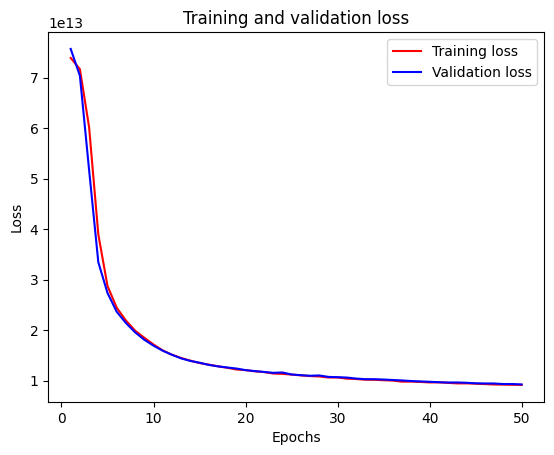

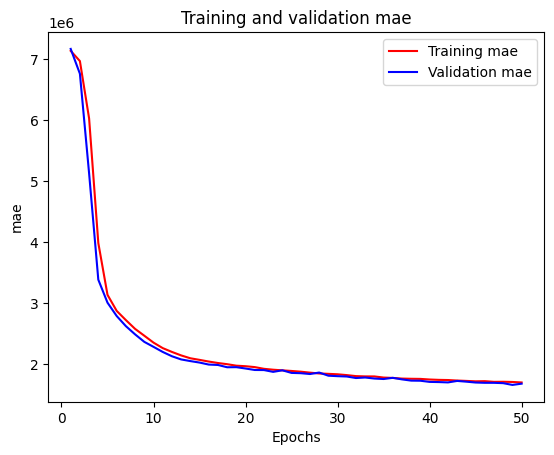

In [25]:
graphs(best_history)

Предсказания и подсчет коэффициента корреляции лучшей модели

In [26]:
best_predicted_y = best_model.predict(x_test)
best_predicted_y = np.reshape(best_predicted_y, (best_predicted_y.shape[0]))

best_cc = np.corrcoef(best_predicted_y, y_test)
best_cc = best_cc[0][1]
print(f'Correlation Coefficient: {best_cc}')

286/286 [==============================] - 1s 3ms/step
Correlation Coefficient: 0.7782476416755673
